# Image Processing 04

```
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.color import label2rgb
from skimage.filters import try_all_threshold, threshold_otsu, threshold_local, sobel, gaussian
from skimage import exposure
from skimage.transform import rotate, resize, rescale
from skimage import morphology
from skimage.restoration import inpaint, denoise_tv_chambolle, denoise_bilateral
from skimage.util import random_noise
from skimage.segmentation import slic
```

In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.segmentation import slic
from skimage.color import label2rgb

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, original_title, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title(original_title)
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

## Superpixels and segmentation

* In this subunit, we'll cover more about image segmentation: one of the most fundamental and studied topics in image processing. 
* The goal of **segmentation** is to partition images into regions, or segments, to simplify and/or change the representation into something more meaningful and easier to analyze.
* For example, **before a tumor is analyzed** in a computed tomography, **it has to be detected and somehow isolated from the rest of the image.**
    * Or, **before recognizing a face**, it has to also be **picked out from its background.**
* Previously we learned about **Thresholding**, which is the **simplest method of segmentation**, separating foreground from background (kind of... agree to disagree).

#### Image representation
* Consider how we represent images; they are represented as a grid of pixels.
* The issue is that they're not a completely natural representation of an image.
* If you were to isolate a single pixel from an image, would you be able to tell that the pixel came from a particular image and that this single pixel holds a logical meaning. 
* **A single pixel, by itself, is not a natural representation.**

## Superpixels
* **We can explore more logical meanings in an image that's formed by bigger regions or grouped pixels** (than single pixels on their own). These are known as **superpixels.**
* A **superpixel** is a **group of connected pixels with similar colors or gray levels.**
    * These carry more meaning than their simple pixel grid counterparts.
* **Superpixel segmentation** is dividing an image into superpixels.

#### Benefits of superpixels
* **Superpixel segmentation** is dividing an image into superpixels.
* **Superpixel segmentation** has been applied to many computer vision tasks, like **visual tracking** and **image classification**.
* Some advantages for using superpixels are:
    * More meaningful regions
    * Computational efficiency
        * Reduce an image from thousands of pixels down to some regions for subsequent algorithms, so you have computational efficiency.
        
## Segmentation
* Two types of segmentation are:
    * **1) Supervised:** where some prior knowledge is used to guide the algorithm. 
        * Example: the kind of thresholding in which we specify the threshold value ourselves.
    * **2) Unsupervised:** where no prior knowledge is required. 
        * These algorithms try to subdivide images into meaningful regions automatically.
        * The user may still be able to tweak certain settings to obtain the desired output. 
        * Example: Otsu thresholding

### Unsupervised Segmentation

#### Simple Linear Iterative Clustering (SLIC)
* An unsupervised segmentation technique based on superpixels
* Segments the image using **K-Means clustering**.
* It takes in all the pixel values of the image and tries to separate them into a predefined number of sub-regions.
* We can find the algorithm in the `segmentation` module as the `slic` function
* This method returns the segmented regions, also known as **labels**.
* **labels = segmented regions**
* Below we use this function with default parameters to obtain the segments.

```
# Import the modules
from skimage.segmentation import slic
from skimage.color import label2rgb

# Obtain the segments
segments = slic(image)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, image, kind='avg')

show_image(image)
show_image(segmentation_image, 'Segmented image')
```
* We use the `label2rgb` method from the color module to return an image where the segments obtained from the slic method will be highlighted, either with random colors, or with the average color of the superpixel segment. In this example, we used the average color by setting `kind ='avg'`.
* **Note that default `n_segments = 100`**
***

* If we want more segments, say 300, we can specify this with an optional parameter `n_segments` with the `slic` call.

```
# Obtain the segments
segments = slic(image, n_segment= 300)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, image, kind='avg')

show_image(image)
show_image(segmented_image, 'Segmented image')
```

[skimage.color documentation](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.label2rgb)
* Note new FutureWarnings: **must specify `slic(start_label=1)` and `labelrgb(bg_label=0)`**
* **Use either:**
    * **`show_image(segmented_image/255)`**
    * **OR**
    * **`show_image(np.array(segmented_image, np.int32)`**

```
segments = slic(coffee_image, start_label=1)
segmented_image = label2rgb(segments, coffee_image, kind='avg', bg_label=0)
show_image(coffee_image, 'Original')
show_image(segmented_image/255, 'Segmented image')
```

### Coffee image segmentation

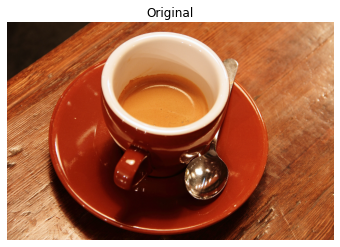

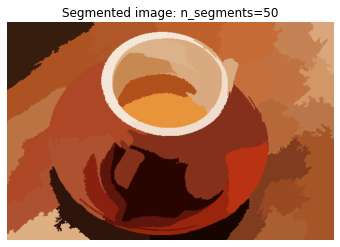

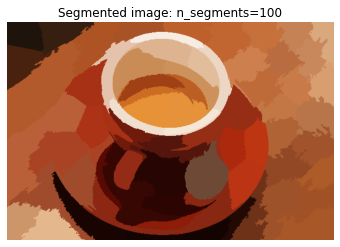

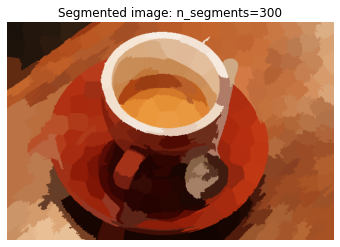

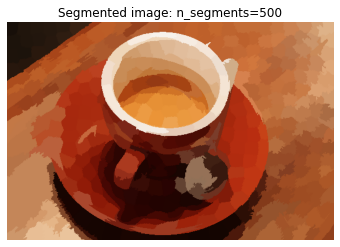

In [11]:
coffee_image = data.coffee()
show_image(coffee_image, 'Original')
segment_list = [50, 100, 300, 500]
# from skimage.segmentation import slic
# from skimage.color import label2rgb

for segment in segment_list:
    segments = slic(coffee_image, n_segments = segment, start_label=1)
    segmented_image = label2rgb(segments, coffee_image, kind = 'avg', bg_label=0)
    show_image(segmented_image/255, 'Segmented image: n_segments='+str(segment))

## Cat image segmentation

In [12]:
cat_image = data.cat()

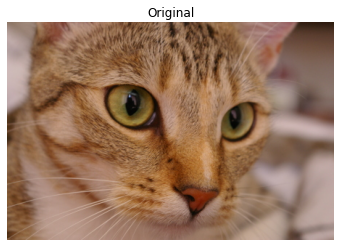

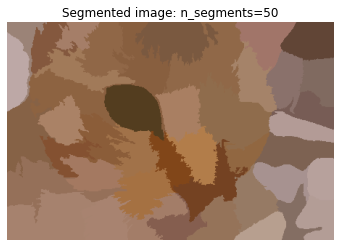

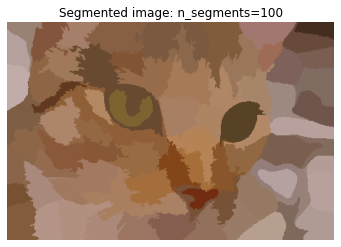

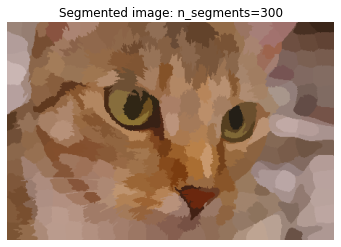

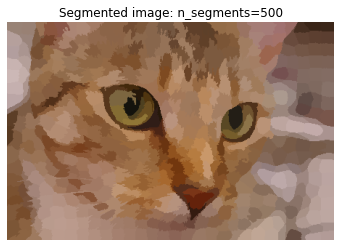

In [13]:
show_image(cat_image, 'Original')
for segment in segment_list:
    segments = slic(cat_image, n_segments = segment, start_label=1)
    segmented_image = label2rgb(segments, cat_image, kind = 'avg', bg_label=0)
    show_image(segmented_image/255, 'Segmented image: n_segments='+str(segment))

## Astronaut image segmentation

In [15]:
astro_image = data.astronaut()

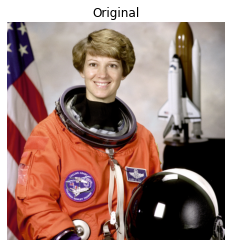

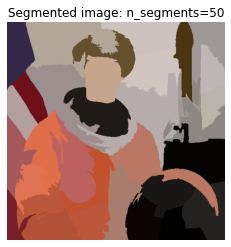

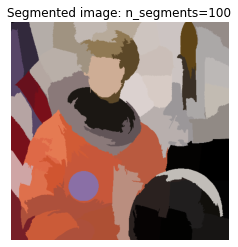

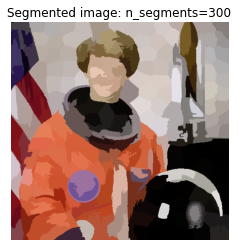

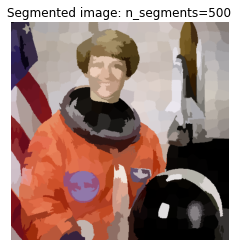

In [16]:
show_image(astro_image, 'Original')
for segment in segment_list:
    segments = slic(astro_image, n_segments = segment, start_label=1)
    segmented_image = label2rgb(segments, astro_image, kind = 'avg', bg_label=0)
    show_image(segmented_image/255, 'Segmented image: n_segments='+str(segment))

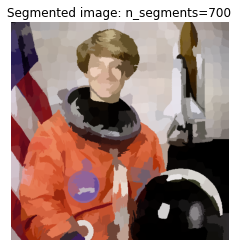

In [18]:
segments = slic(astro_image, n_segments = 700, start_label=1)
segmented_image = label2rgb(segments, astro_image, kind = 'avg', bg_label=0)
show_image(segmented_image/255, 'Segmented image: n_segments=700')

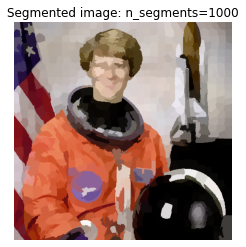

In [19]:
segments = slic(astro_image, n_segments = 1000, start_label=1)
segmented_image = label2rgb(segments, astro_image, kind = 'avg', bg_label=0)
show_image(segmented_image/255, 'Segmented image: n_segments=1000')